In [208]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [171]:
df = pd.read_csv('/Users/jerife/Desktop/data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [172]:
df.shape

(768, 9)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [174]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [175]:
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuacy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('confusion')
    print(confusion)
    print('정확도 : {}'.format(np.around(accuacy,4)))
    print('정밀도: {}'.format(np.around(precision,4)))
    print('재현율 : {}'.format(np.around(recall,4)))
    print('F1 : {}'.format(np.around(f1,4)))  
    print('ROC_AUC : {}'.format(np.around(roc_auc,4)))

In [176]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
lg_reg = LogisticRegression()

lg_reg.fit(x_train,y_train)
pred = lg_reg.predict(x_test)
pred_proba = lg_reg.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[100  20]
 [ 33  39]]
정확도 : 0.724
정밀도: 0.661
재현율 : 0.5417
F1 : 0.5954
ROC_AUC : 0.7635


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [177]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


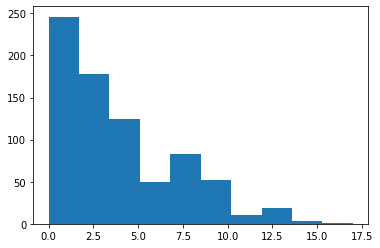

In [178]:
plt.hist(df['Pregnancies'])
plt.show()

In [179]:
print('[[[0 Value columns]]]\n')
for col in x.columns:
    value = [c for c in df[col] if c==0]
    print(col, np.round(len(value)/df.shape[0]*100,2) , '%')

[[[0 Value columns]]]

Pregnancies 14.45 %
Glucose 0.65 %
BloodPressure 4.56 %
SkinThickness 29.56 %
Insulin 48.7 %
BMI 1.43 %
DiabetesPedigreeFunction 0.0 %
Age 0.0 %


In [180]:
print('[[[0 Value for Median]]\n')
for col in x.columns:
    for i,c in enumerate(df[col]):
        if c==0:
            df[col][i]=df[col].mean() 

[[[0 Value for Median]]



<ipython-input-180-4560e9dc8531>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=df[col].mean()


In [181]:
print('[[[0 Value columns]]]\n')
for col in x.columns:
    value = [c for c in df[col] if c==0]
    print(col, np.round(len(value)/df.shape[0]*100,2) , '%')

[[[0 Value columns]]]

Pregnancies 0.0 %
Glucose 0.0 %
BloodPressure 0.0 %
SkinThickness 0.0 %
Insulin 0.0 %
BMI 0.0 %
DiabetesPedigreeFunction 0.0 %
Age 0.0 %


In [182]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.371094,121.68099,72.304688,27.419271,129.519531,32.453800,0.471876,33.240885,0.348958
std,2.996138,30.43605,12.106799,9.255676,89.684233,6.875237,0.331329,11.760232,0.476951
min,1.000000,44.00000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.75000,64.000000,22.000000,87.000000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.00000,72.000000,25.000000,106.000000,32.264327,0.372500,29.000000,0.000000
75%,6.000000,140.25000,80.000000,32.000000,129.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.00000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


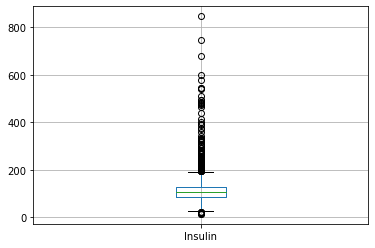

In [183]:
df.boxplot('Insulin')

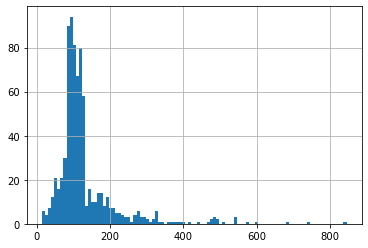

In [184]:
df['Insulin'].hist(bins=100)

In [185]:
Insulin_over_lst = []
for i, col in enumerate(df['Insulin']):
    if col>500:
        Insulin_over_lst.append(i)
print(Insulin_over_lst)

[8, 13, 228, 247, 286, 409, 584, 655, 753]


In [186]:
df =df.drop(Insulin_over_lst,axis=0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,80,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,3,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,129,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,27,129,30.1,0.349,47,1


In [187]:
df.reset_index(inplace=True)
df.head(10)

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,79,33.600000,0.627,50,1
1,1,1,85,66,29,79,26.600000,0.351,31,0
2,2,8,183,64,20,80,23.300000,0.672,32,1
3,3,1,89,66,23,94,28.100000,0.167,21,0
4,4,3,137,40,35,168,43.100000,2.288,33,1
5,5,5,116,74,20,80,25.600000,0.201,30,0
6,6,3,78,50,32,88,31.000000,0.248,26,1
7,7,10,115,69,20,80,35.300000,0.134,29,0
8,9,8,125,96,20,80,31.992578,0.232,54,1
9,10,4,110,92,20,80,37.600000,0.191,30,0


In [188]:
df.shape

(759, 10)

In [189]:
x = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [196]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
lg_reg = LogisticRegression()

lg_reg.fit(x_train,y_train)
pred = lg_reg.predict(x_test)
pred_proba = lg_reg.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[106   9]
 [ 32  43]]
정확도 : 0.7842
정밀도: 0.8269
재현율 : 0.5733
F1 : 0.6772
ROC_AUC : 0.8504


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [204]:
print('cross_val_score : ',np.mean(cross_val_score(lg_reg,x,y,scoring='accuracy',cv=5)))
print('cross_val_score : ',np.mean(cross_val_score(lg_reg,x,y,scoring='f1',cv=5)))
print('cross_val_score : ',np.mean(cross_val_score(lg_reg,x,y,scoring='roc_auc',cv=5)))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

cross_val_score :  0.7403799233182293
cross_val_score :  0.5290041638590852


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

cross_val_score :  0.7973452595622407


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [194]:
y.value_counts()

0    497
1    262
Name: Outcome, dtype: int64

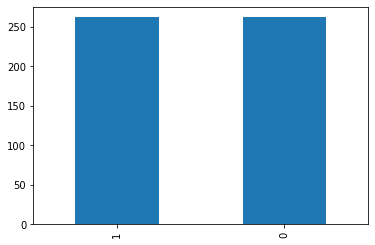

In [216]:
rus = RandomUnderSampler()
x_rus,y_rus = rus.fit_sample(x,y)
y_rus.value_counts().plot(kind='bar')

In [217]:
x_train,x_test,y_train,y_test = train_test_split(x_rus,y_rus)
lg_reg = LogisticRegression()

lg_reg.fit(x_train,y_train)
pred = lg_reg.predict(x_test)
pred_proba = lg_reg.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[47 15]
 [22 47]]
정확도 : 0.7176
정밀도: 0.7581
재현율 : 0.6812
F1 : 0.7176
ROC_AUC : 0.8036


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


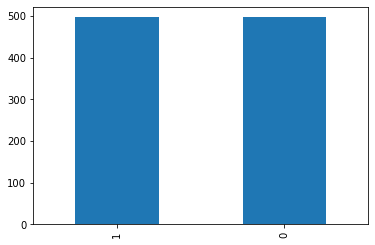

In [218]:
ros = RandomOverSampler()
x_ros,y_ros = ros.fit_sample(x,y)
y_ros.value_counts().plot(kind='bar')

In [228]:
x_train,x_test,y_train,y_test = train_test_split(x_ros,y_ros)
lg_reg = LogisticRegression()

lg_reg.fit(x_train,y_train)
pred = lg_reg.predict(x_test)
pred_proba = lg_reg.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[ 84  38]
 [ 25 102]]
정확도 : 0.747
정밀도: 0.7286
재현율 : 0.8031
F1 : 0.764
ROC_AUC : 0.8082


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [221]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
lg_reg = LogisticRegression()

lg_reg.fit(x_train,y_train)
pred = lg_reg.predict(x_test)
pred_proba = lg_reg.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[102  14]
 [ 39  35]]
정확도 : 0.7211
정밀도: 0.7143
재현율 : 0.473
F1 : 0.5691
ROC_AUC : 0.7922


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [229]:
print('cross_val_score : ',np.mean(cross_val_score(lg_reg,x_ros,y_ros,scoring='accuracy',cv=5)))
print('cross_val_score : ',np.mean(cross_val_score(lg_reg,x_ros,y_ros,scoring='f1',cv=5)))
print('cross_val_score : ',np.mean(cross_val_score(lg_reg,x_ros,y_ros,scoring='roc_auc',cv=5)))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

cross_val_score :  0.6630120298462007
cross_val_score :  0.675503680890434


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

cross_val_score :  0.737482297724722


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
